Analiza mieszkan na sprzedaz w OLX

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv("../scraper/off.csv")
shape1 = df.shape

all_rows = shape1[0]
print(all_rows)

1297


In [125]:
shape2 = df.drop_duplicates().shape
rows_no_duplicates = shape2[0]
print(rows_no_duplicates)


1013


Number of duplicates

In [126]:
print(str(round(100.00 * (all_rows-rows_no_duplicates)/all_rows,2)) + "%")

21.9%


Price

C:\Users\pawel\AppData\Local\Temp\ipykernel_12752\2765330298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], hist=True, kde=True,


(100000.0, 2000000.0)

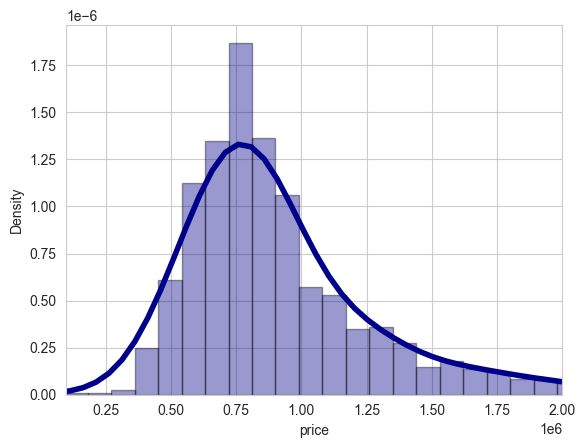

In [127]:
df['price'] = df['price'].astype(float)

fig, ax = plt.subplots()
sns.distplot(df['price'], hist=True, kde=True, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax = ax)
ax.set_xlim(100000,2000000)


In [128]:
median = round(np.median(df['price']))
print("MEDIAN : " + str(median))
average = round(np.average(df['price']))
print("AVERAGE : " + str(average))

MEDIAN : 834675
AVERAGE : 998344


Price per meter


C:\Users\pawel\AppData\Local\Temp\ipykernel_12752\1729850708.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_pm'], hist=True, kde=True,


(3000.0, 30000.0)

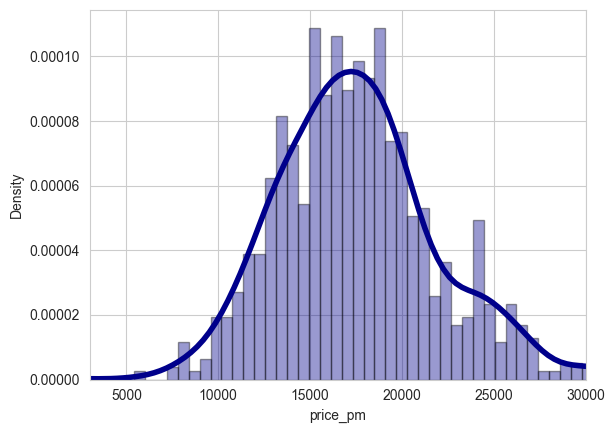

In [129]:
df['price_pm'] = df['price_pm'].astype(float)

fig, ax = plt.subplots()
sns.distplot(df['price_pm'], hist=True, kde=True, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax = ax)
ax.set_xlim(3000,30000)

In [130]:
median = round(np.median(df['price_pm']))
print("MEDIAN : " + str(median))
average = round(np.average(df['price_pm']))
print("AVERAGE : " + str(average))

MEDIAN : 17333
AVERAGE : 17828


Size

C:\Users\pawel\AppData\Local\Temp\ipykernel_12752\2704968582.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['size'], hist=True, kde=True,


(10.0, 150.0)

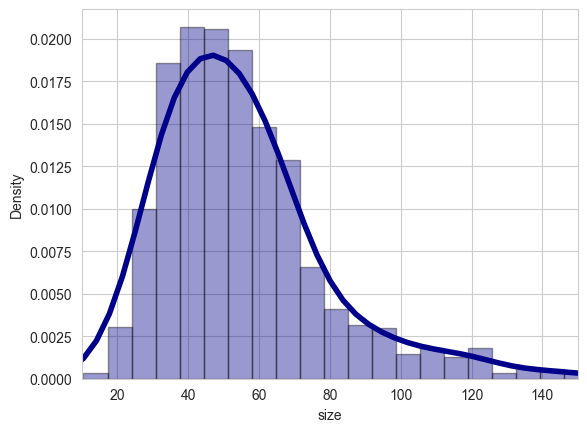

In [133]:
df['size'] = df['size'].astype(float)

fig, ax = plt.subplots()
sns.distplot(df['size'], hist=True, kde=True, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax = ax)
ax.set_xlim(10,150)

In [143]:
median = round(np.median(df['size']),2)
print("MEDIAN : " + str(median))
average = round(np.average(df['size']),2)
print("AVERAGE : " + str(average))

MEDIAN : 51.2
AVERAGE : 57.96
